<a href="https://colab.research.google.com/github/ArhumAlI/Deep-Learning/blob/master/Project2_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [13]:
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28


(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.2194 - acc: 0.9305 - val_loss: 0.0416 - val_acc: 0.9857
Epoch 2/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0519 - acc: 0.9845 - val_loss: 0.0277 - val_acc: 0.9900
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0345 - acc: 0.9894 - val_loss: 0.0230 - val_acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0223 - val_acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0213 - val_acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0175 - acc: 0.9949 - val_loss: 0.0170 - val_acc: 0.9944
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.

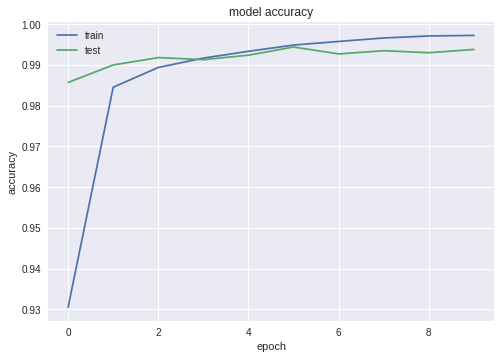

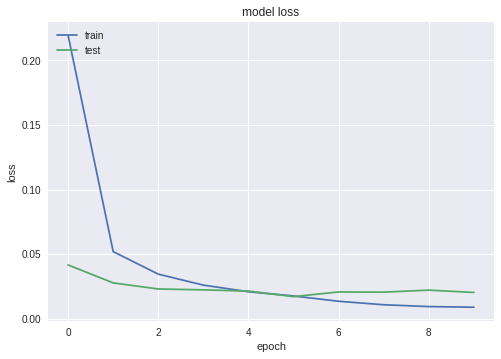

In [14]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()